<a href="https://colab.research.google.com/github/Kidchris/Lesson/blob/master/bankChurners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
fichier = files.upload()

data = pd.read_csv('BankChurners.csv')
pd.set_option('display.max_columns', 24)
data.rename(columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": 'n_flag_1',
"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2" : "n_flag_2" }, inplace=True)
data.drop('CLIENTNUM', axis=1, inplace=True)
data.head()

Saving BankChurners.csv to BankChurners.csv


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,n_flag_1,n_flag_2
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
data.Attrition_Flag.value_counts()#normalize=True)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

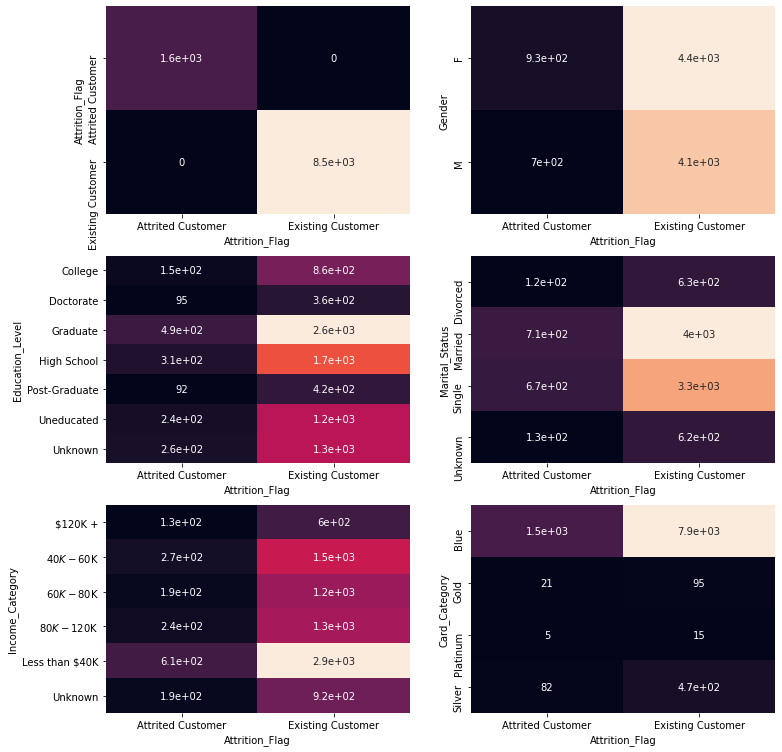

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,13))

for i, num in zip(data.select_dtypes('object'), range(1, len(data.select_dtypes('object').columns)+1)):
    plt.subplot(int(len(data.select_dtypes("object").columns))/2, 2, num)
    sns.heatmap(pd.crosstab(data[i], data['Attrition_Flag']), annot=True, cbar=False)


In [7]:

len(data.select_dtypes('object'))+1

10128

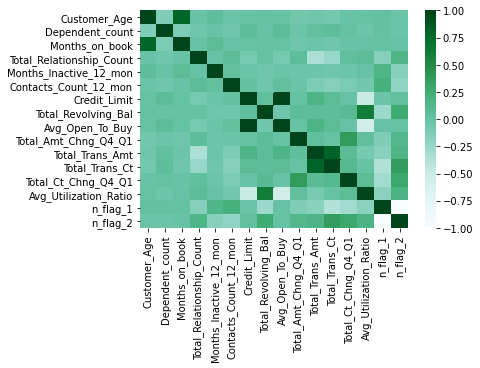

In [8]:
sns.heatmap(data.corr(), cmap='BuGn')

## Preprocessing now

In [9]:
# importation of dataset



In [10]:
class Preprocess :
    
    def __repr__(self):
        return 'Here we are in class Preprocessing \nType "dir(Preprocess)", to see all alternatives'
    
    ## Preprocess : Splitting in train and test sets
    def split(self, data):
        from sklearn.model_selection import train_test_split
        
        self.X = data.drop('Attrition_Flag', axis=1)
        self.Y = data['Attrition_Flag']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.Y, random_state=0, train_size=0.9)
        print('Train : ',self.X_train.shape,'\nTest : ', self.X_test.shape)
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    ## Preprocess : dealing with missing values
    def missings(self, data):
            # if to delete data use dropna from pandas
        data = data.dropna(axis=0)
        return data
            # if need to fill NA values use impute methods
        #from sklearn.impute import SimpleImputer
        #self.model = SimpleImputer(strategy='most_frequent')
        #self.model.fit(data)
        #return self.model.transform(data)
        
    ## Preprocess : converting string to int
    def encoder(self, data):
        for self.dt in data.select_dtypes("object"):
            data[self.dt] = data[self.dt].astype('category').cat.codes
        return data
            # if need for onehotencoding 
        #from sklearn.preprocessing import OneHotEncoder
        #self.model = OneHotEncoder()
        #for dt in data.select_dtypes(include='object'):
            #data[dt] = self.model.fit_transform(data[dt])
    
    ## Preprocess :  Standardisation
    def standar(self, data=None):
        from sklearn.preprocessing import StandardScaler
        import pandas as pd
        
        self.model = StandardScaler()
        return pd.DataFrame(self.model.fit_transform(data), columns=data.columns)
    
    ## Preprocess : handling outilers and inliers
    def outliers(self,data=None):
        from sklearn.ensemble import IsolationForest
            #  in case of needof PCA
        #from sklearn.decomposition import PCA
        #self.model = PCA(n_components=0.95)
        #self.model.fit(data)
        #return self.model.transform(data)
        
        self.model = IsolationForest(contamination= 0.02)
        return self.model
    
    ## Preprocess : in case of need of polynomialFeatures
    def poly_features(self, degre=2):
        from sklearn.preprocessing import PolynomialFeatures
        
        self.model = PolynomialFeatures(degre)
        return self.model
    
   
    ## Preprocess : regression model just for testing preprocess
    def regression(self, model=None, X_train=None, y_train=None, X_test=None, y_test=None):
        
        self.model = model
        self.model.fit(X_train, y_train)
        return self.model.score(X_test, y_test)
        
    
    ## Preprocess : classification model just for testing preprocess
    def classification(self, model=None,  X_train=None, y_train=None, X_test=None, y_test=None):
        
        self.model = model
        self.model.fit(X_train, y_train)
        return self.model.score(X_test, y_test)
    
    def curves(self,model=None, X_train=None, y_train=None):
        from sklearn.model_selection import learning_curve
        import numpy as np
        import matplotlib.pyplot as plt
        
        N, train, val = learning_curve(model, X_train, y_train, train_sizes=np.linspace(.1,1.,10))
        plt.plot(N, train.mean(axis=1), label="training")
        plt.plot(N, val.mean(axis=1), label="validation")
        plt.scatter([],[], label=model.__class__.__name__)
        plt.legend()
        

In [48]:
data_prepro = data.copy()
prepro = Preprocess()


In [50]:
prepro.encoder(data_prepro)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,n_flag_1,n_flag_2
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,0,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,0,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,0,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [47]:
data_prepro.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,n_flag_1,n_flag_2
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [51]:
X_train, X_test, y_train, y_test = prepro.split(data_prepro)

X_test.head()

Train :  (9114, 21) 
Test :  (1013, 21)


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,n_flag_1,n_flag_2
3358,44,1,5,5,0,2,0,39,5,2,0,16034.0,1597,14437.0,0.775,3628,59,0.903,0.100,0.000045,0.999960
9951,44,0,3,6,2,5,0,34,2,3,3,26021.0,0,26021.0,1.040,8898,60,0.538,0.000,0.997110,0.002889
3848,37,0,3,3,2,4,0,26,3,1,2,2917.0,2216,701.0,0.810,4524,67,0.489,0.760,0.000056,0.999940
1666,34,1,1,2,1,1,0,36,6,2,3,3735.0,1285,2450.0,1.034,1877,33,1.200,0.344,0.000180,0.999820
8383,51,0,4,3,2,4,0,33,2,4,3,3068.0,2071,997.0,0.854,5524,71,0.972,0.675,0.000373,0.999630


In [54]:
X_train= prepro.standar(X_train)
X_test = prepro.standar(X_test)

## Modelisation 

In [55]:
import tensorflow as tf

In [56]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(X_train.shape[1],))
model.add(tf.keras.layers.Dense(1, activation='relu'))
model.compile(loss='binary_crossentropy', metrics='accuracy', optimizer="adam")

In [57]:
result = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)


Epoch 1/50
285/285 [==============================] - 1s 2ms/step - loss: 5.3267 - accuracy: 0.5238 - val_loss: 4.1503 - val_accuracy: 0.5923
Epoch 2/50
285/285 [==============================] - 0s 1ms/step - loss: 4.0916 - accuracy: 0.6001 - val_loss: 3.4723 - val_accuracy: 0.6535
Epoch 3/50
285/285 [==============================] - 0s 1ms/step - loss: 3.2327 - accuracy: 0.6585 - val_loss: 2.5140 - val_accuracy: 0.7127
Epoch 4/50
285/285 [==============================] - 0s 1ms/step - loss: 2.1511 - accuracy: 0.7359 - val_loss: 1.3020 - val_accuracy: 0.8055
Epoch 5/50
285/285 [==============================] - 0s 1ms/step - loss: 1.2001 - accuracy: 0.8082 - val_loss: 0.6167 - val_accuracy: 0.8766
Epoch 6/50
285/285 [==============================] - 0s 1ms/step - loss: 0.5297 - accuracy: 0.8869 - val_loss: 0.3487 - val_accuracy: 0.9200
Epoch 7/50
285/285 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.9196 - val_loss: 0.2290 - val_accuracy: 0.9536
Epoch 

In [58]:
print('train', model.evaluate(X_train, y_train))
print('test', model.evaluate(X_test, y_test))


285/285 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
train [0.0, 1.0]
32/32 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
test [0.0, 1.0]


In [59]:
import matplotlib.pyplot as plt


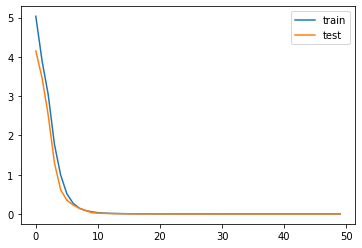

In [60]:
plt.plot(result.history['loss'], label='train')
plt.plot(result.history['val_loss'], label='test')
plt.legend()

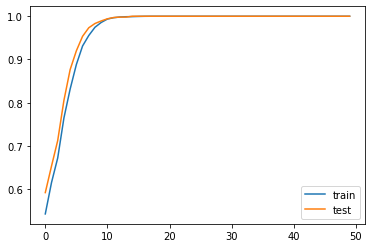

In [61]:
plt.plot(result.history['accuracy'], label='train')
plt.plot(result.history['val_accuracy'], label='test')
plt.legend()

In [62]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 22        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.save('model_bank.h5')